In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

In [2]:
ds = pd.read_csv('all_stocks_5yr.csv')

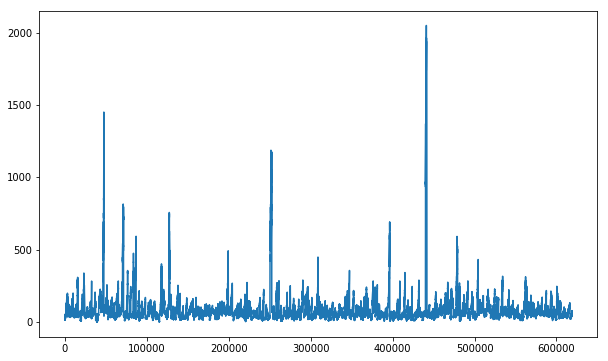

In [3]:
ds['close'].plot(figsize=(10,6))

In [5]:
ds.tail(5)

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [23]:
df = ds.loc[ds['Name']=='AMZN']

In [15]:
df.head()

,date,open,high,low,close,volume,Name
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [24]:
df['date'] = pd.to_datetime(df['date'])
df= df.reset_index()
df=df[['date','open','close']] 

C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
df.set_index('date',inplace=True)

In [27]:
df.tail()

,open,close
date,,
2018-02-01,1445.00,1390.00
2018-02-02,1477.39,1429.95
2018-02-05,1402.62,1390.00
2018-02-06,1361.46,1442.84
2018-02-07,1449.00,1416.78


In [28]:
df.describe()

,open,close
count,1259.000000,1259.000000
mean,576.867264,576.880041
std,282.500019,282.500395
min,248.940000,248.230000
25%,325.870000,325.800000
50%,506.000000,503.820000
75%,777.620000,777.420000
max,1477.390000,1450.890000


In [72]:
train = df[:698]
test = df[698:]

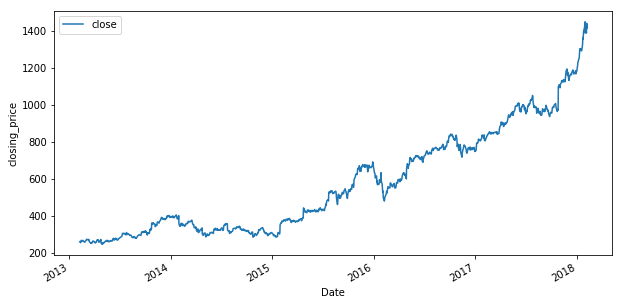

In [33]:
df['close'].plot(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('closing_price')
plt.legend()

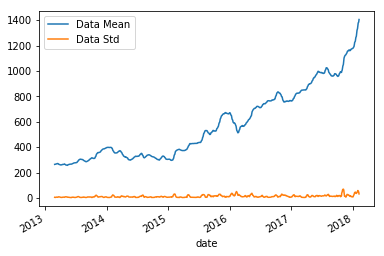

In [29]:
df['close'].rolling(12).mean().plot(label='Data Mean')
df['close'].rolling(12).std().plot(label='Data Std')
plt.legend()

In [30]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset

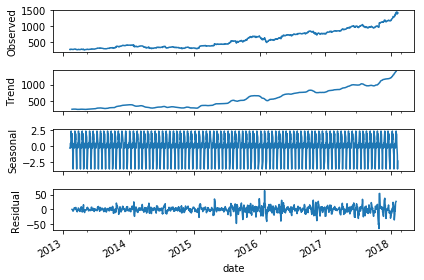

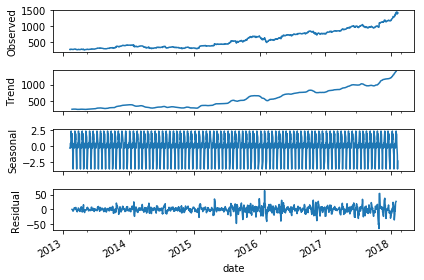

In [34]:
decomp = seasonal_decompose(df['close'],model='additive',freq=14)
decomp.plot()

In [39]:
train.head()
test.head()

,open,close
date,,
2015-11-16,640.92,647.81
2015-11-17,650.65,643.30
2015-11-18,646.51,663.54
2015-11-19,664.99,661.27
2015-11-20,667.94,668.45


In [36]:
from statsmodels.tsa.stattools import adfuller

In [40]:
def adf_check(df):
    result = adfuller(df,autolag='AIC')
    if result[1] <= 0.05  :
        print("Stationary")
    else:
        print("Not Stationary")
    

In [41]:
adf_check(train['close'])

Not Stationary


In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#from statsmodels.graphics.tsaplots import 

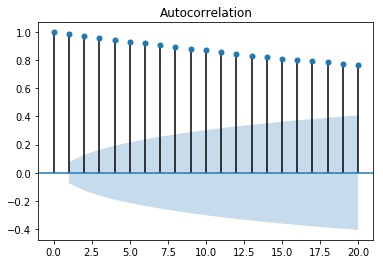

In [46]:
plot_acf(train['close'],lags=20)
plt.show()

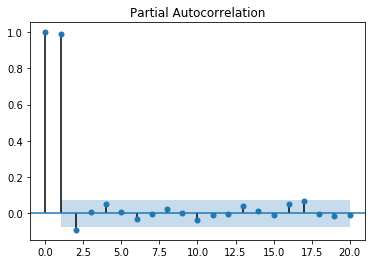

date
2018-02-01   NaN
2018-02-02   NaN
2018-02-05   NaN
2018-02-06   NaN
2018-02-07   NaN
Name: AR, dtype: float64

In [63]:
plot_pacf(train['close'],lags=20)
plt.show()
pred['AR'].tail()

C:\Users\Rupesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


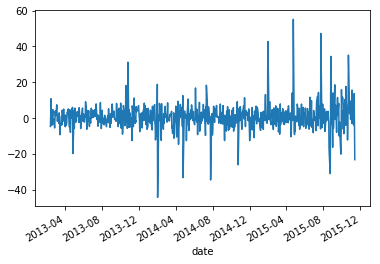

In [73]:
train['1st Diff'] = train['close'] - train['close'].shift(1)
train['1st Diff'].dropna().plot()
#train =train['1st Diff'].dropna()

In [74]:
train.head()

,open,close,1st Diff
date,,,
2013-02-08,261.40,261.95,NaN
2013-02-11,263.20,257.21,-4.74
2013-02-12,259.19,258.70,1.49
2013-02-13,261.53,269.47,10.77
2013-02-14,267.37,269.24,-0.23


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [77]:
pred=test.copy()
model= ARIMA(train['close'],order=(2,1,0))
fit = model.fit()
pred['ARIMA']=fit.predict(start=2,end=len(test))

C:\Users\Rupesh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Rupesh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Rupesh\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Rupesh\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: Futu

In [78]:
pred['ARIMA'].tail()

date
2018-02-01   NaN
2018-02-02   NaN
2018-02-05   NaN
2018-02-06   NaN
2018-02-07   NaN
Name: ARIMA, dtype: float64

In [79]:
pred['ARIMA'].plot(figsize=(10,6),label='predicted data')
plt.legend()

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000027AFF9F0D08> (for post_execute):


ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Stationary


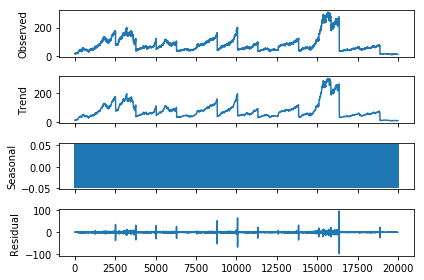

In [123]:
decomp = seasonal_decompose(df['forcast'],model='additive',freq=12)
decomp.plot()
adf_check(df['forcast'])

In [107]:
df.head()

0    14.75
1    14.46
2    14.27
3    14.66
4    13.99
Name: close, dtype: object

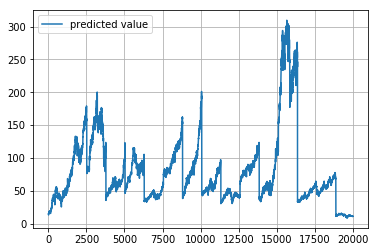

In [139]:
plt.plot(df['forcast'], label="predicted value")
plt.legend(loc="upper left")
plt.grid(True)